# 1. Perkenalan

**Milestone 2**

Nama    : Fahmi

Batch   : RMT-034

## 1.1. Gambaran Besar Dataset

Dataset yang saya pakai berisi informasi tentang perilaku pelanggan saat melakukan pembelian dengan berbagai atribut/fitur yang sekiranya mempengaruhi keputusan pelanggan untuk membeli.

Berikut selengkapnya.

|Nama Kolom| Deksripsi |Nilai|
|:-------:|:-----------:|:------:|
|Age|Umur||
|Gender|Jenis kelamin||
|AnnualIncome|Penadapatan tahunan pelanggan (dalam dolar)||
|NumberOfPurchases|Jumlah total pembelian/check out (baik yang sampai selesai dibayar maupun tidak) yang dilakukan oleh pelanggan||
|ProductCategory|Kategori produk yang rencananya dibeli pelanggan|0: Electronics,<br><br> 1: Clothing,<br><br> 2: Home Goods,<br><br> 3: Beauty,<br><br> 4: Sports|
|TimeSpentOnWebsite|Waktu yang dihabiskan pelanggan di situs web (dalam menit)||
|LoyaltyProgram|Apakah pelanggan adalah anggota program loyalitas (member)|0: No,<br><br> 1: Yes|
|DiscountsAvailed|Jumlah diskon yang telah dimanfaatkan pelanggan|0 (belum pernah) - 5|
|PurchaseStatus|Kemungkinan pelanggan menyelesaikan pembelian dengan membayar pesanan|0: No Purchase,<br><br> 1: Yes|

## 1.2. Objective

Notebook ini berisi analisis berikut skrip pembuatan machine learning classification yang digunakan untuk memprediksi apakah customer akan menyelesaikan pembelian (membayar) atau tidak setelah melakukan check out.

# 2. Import Libraries

Pertama-tama, saya mengimport terlebih dahulu modul maupun pustaka yang sekiranya akan digunakan pada project ini.

In [46]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 3. Data Loading

Saya akan mengakses file csv `customer_purchase_data.csv` untuk selanjutnya nanti diolah dan digunakan pada pembuatan model machine learning ini.

In [47]:
# load dataset
df = pd.read_csv('customer_purchase_data.csv')

# Cek sample
df.sample(5)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
625,46,1,132847.369714,5,4,28.376025,0,3,0
886,49,1,70898.340763,12,4,25.716824,0,4,0
1300,28,1,79064.904999,11,4,51.914879,1,1,0
1493,34,1,20418.374269,9,1,54.459955,0,0,0
339,36,0,42558.186948,9,1,14.157580,0,2,0


Dataset berhasil dimuat.

## 3.1. Simple Exploration

Selanjutnya, mari mengecek dahulu ringkasan dataset yang ada.

In [48]:
# Cek summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


- Dataset tersebut ternyata memiliki **1500 baris** dengan total **9 kolom**.

- Kolom-kolom tersebut 2 di antaranya bertipe float dan 7 sisanya integer. **Tidak tampak perlu dilakukan perubahan tipe kolom** ke depannya.

- Sekilas juga **terlihat memiliki missing value** yang perlu dilakukan handling pada sejumlah kolom.

Selanjutnya, untuk memudahkan coding, saya perlu memastikan pula nama kolom, apakah sudah konsisten atau tidak, seperti ada spasi di awal atau akhir penamaannya.

In [49]:
# Cek kolom
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

Tampaknya tidak ada kolom yang perlu dilakukan handling whitespace. Setelah itu, beranjak memastikan apakah ada baris yang duplikat

In [50]:
# cek duplikat
df.duplicated().sum()

112

Disebutkan bahwa ada baris yang duplikat. Coba saya lihat dahulu sampelnya apakah benar-benar duplikat atau tidak.

In [51]:
# cek duplikat dengan menjadikan kolom `AnnualIncome` sebagai sortir
df[df.duplicated(keep=False)].sort_values(by='AnnualIncome').head(6)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1493,34,1,20418.374269,9,1,54.459955,0,0,0
780,34,1,20418.374269,9,1,54.459955,0,0,0
687,28,1,20496.589946,9,2,36.853453,0,0,0
934,28,1,20496.589946,9,2,36.853453,0,0,0
1265,49,1,21213.110578,11,0,18.673823,0,3,0
372,49,1,21213.110578,11,0,18.673823,0,3,0


Ternyata memang terdapat duplikat pada data di atas. Maka dari itu saya akan melakukan handling nantinya.

Berikutnya, saya akan mengecek apakah adakah baris yang tidak konsisten dari kolom `NumberOfPurchases` dan `PurchaseStatus` yang notabene berhubungan secara konteks.

Langkah ini saya lakukan sebab saya sekilas menemukan ada baris yang `NumberOfPurchase`(jumlah pembelian, entah berhasil atau tidak)-nya == 0, tetapi `PurchaseStatus`-nya 1 (pembelian berhasil).

In [52]:
# cek inkonsistensi data
df[(df['NumberOfPurchases'] == 0) & (df['PurchaseStatus'] == 1)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
62,52,1,116034.009594,0,4,21.420402,1,3,1
144,25,0,72231.244085,0,2,16.826771,1,3,1
185,38,1,30549.393210,0,0,54.249985,0,2,1
542,37,0,51457.026941,0,1,34.708647,1,3,1
599,20,0,111709.907937,0,4,30.840597,0,0,1
663,31,0,102692.486033,0,0,40.284019,0,5,1
949,50,0,100181.869021,0,1,24.706994,0,3,1
976,64,1,55242.512989,0,2,56.051582,0,5,1
1155,30,0,108025.683166,0,0,59.564907,1,4,1
1199,68,1,60677.961248,0,2,58.169104,1,4,1


Ternyata benar saja, memang ada. Oleh karena itu, saya akan melakukan handling khusus pada data bagian data cleaning setelah ini.

## 3.2. Data Cleaning

### 3.2.1. Hapus Baris Duplikat

Saya akan menghapus data duplikat.

In [53]:
# cek sebelum penghapusan
df.duplicated().sum()

112

In [54]:
# hapus baris duplikat
df = df.drop_duplicates()

In [55]:
# cek setelah penghapusan
df.duplicated().sum()

0

Penghapusan baris duplikat sudah selesai

### 3.2.2 Handling Data Inkonsistensi

Seperti yang ditemukan sebelumnya, ada baris yang ternyata tidak konsisten datanya sebagai berikut.

In [56]:
# cek sebelum handling
df[(df['NumberOfPurchases'] == 0) & (df['PurchaseStatus'] == 1)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
62,52,1,116034.009594,0,4,21.420402,1,3,1
144,25,0,72231.244085,0,2,16.826771,1,3,1
185,38,1,30549.393210,0,0,54.249985,0,2,1
542,37,0,51457.026941,0,1,34.708647,1,3,1
599,20,0,111709.907937,0,4,30.840597,0,0,1
663,31,0,102692.486033,0,0,40.284019,0,5,1
949,50,0,100181.869021,0,1,24.706994,0,3,1
976,64,1,55242.512989,0,2,56.051582,0,5,1
1155,30,0,108025.683166,0,0,59.564907,1,4,1
1199,68,1,60677.961248,0,2,58.169104,1,4,1


Ada 11 baris yang tidak konsisten. 

Untuk handling-nya, saya memutuskan untuk mengedrop saja karena saya tidak ingin mengambil risiko menurunkan performa model nantinya bila saya ubah nilai `PurchaseStatus`-nya karena ada kemungkinan inkonsistensi ini merupakan human error.

In [57]:
df.drop(df[(df['NumberOfPurchases'] == 0) & (df['PurchaseStatus'] == 1)].index, inplace=True)

In [58]:
# cek sebelum handling
df[(df['NumberOfPurchases'] == 0) & (df['PurchaseStatus'] == 1)]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus


Handling berhasil.

# 4. Exploratory Data Analysis (EDA)

## 4.1. Distribusi Kelas Target

Pada tahapan ini, saya akan lebih dahulu mengecek ditribusi kelas pada kolom target. Analisis ini penting untuk menentukan perlukan penggunaan teknik oversampling atau undersampling sert metrik apa yang nantinya dipakai.

In [59]:
# cek distribusi kelas
distribution = df['PurchaseStatus'].value_counts(normalize=True)
print(distribution)

PurchaseStatus
0    0.5374
1    0.4626
Name: proportion, dtype: float64


Tampaknya, kedua kelas tidak terlalu berjauhan selisihnya. Untuk lebih jelas, mari lihat secara visual berikut ini.

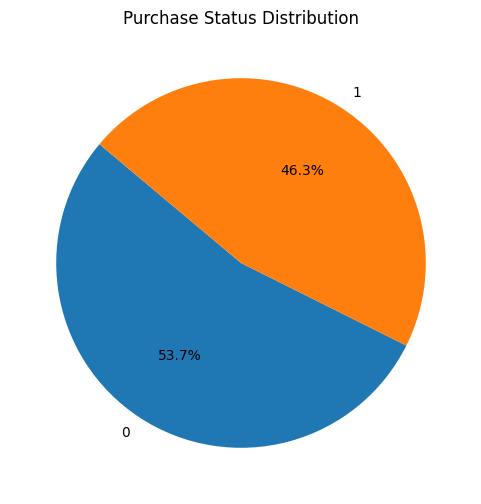

In [60]:
# cek valeu counts kolom target
purchase_counts = df['PurchaseStatus'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Status Distribution')
plt.show()

Kelas `0` lebih besar ketimbang kelas `1`, tetapi tidak sampai lebih dari 70 persen. Dengan begitu, distribusi kelas masih dianggap seimbang.

Oleh karena itu, tidak diperlukan lagi teknik oversampling maupun undersampling ke depannya.

## 4.2. Distribusi Data

Tidak lupa mengecek bagaimana distribusi dataset, apakah normal atau tidak. Itu penting untuk menentukan metode scaling hingga menentukan model yang dipakai ke depannya.

In [61]:
# Cek statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1377.0,43.961511,15.490877,18.000000,31.000000,44.000000,57.000000,70.000000
Gender,1377.0,0.502542,0.500175,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1377.0,84724.794374,37609.196626,20001.512518,53740.431813,84570.404966,117323.880436,149785.176481
NumberOfPurchases,1377.0,10.633261,5.816214,0.000000,6.000000,11.000000,15.000000,20.000000
ProductCategory,1377.0,2.004357,1.421894,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1377.0,30.673328,16.972543,1.037023,16.304585,31.130296,44.505005,59.991105
LoyaltyProgram,1377.0,0.331881,0.471060,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1377.0,2.605664,1.701759,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1377.0,0.462600,0.498780,0.000000,0.000000,0.000000,1.000000,1.000000


- Tampak nilai mean (rata-rata) dan Q2 (median/nilai tengah) seluruh kolom tidak terlalu berjauhan. Itu menandakan bahwa distribusi data relatif normal

- Agar lebih jelas, mari kita lihat plotnya.

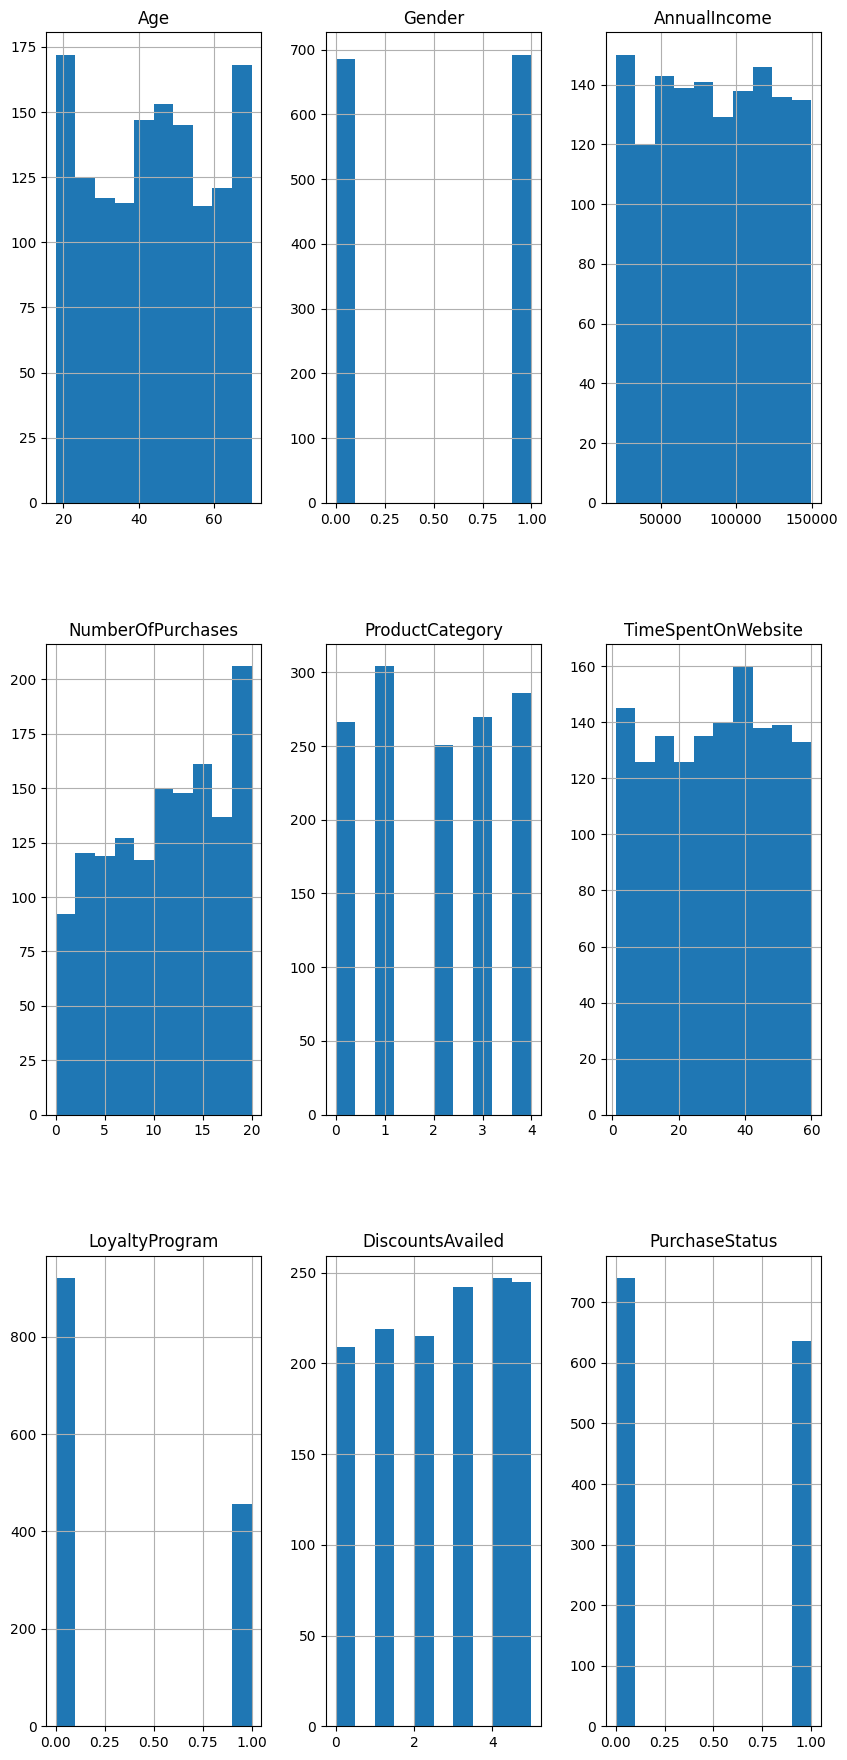

In [62]:
# Buat plot untuk setiap kolom numerikal
df.hist(figsize=(10,22));

- Maka dari itu, saya rasa tidak perlu dilakukan handling outlier.

- Selain itu, pada bagian scaling, saya juga bisa menggunakan MinMax Scaler karena distribusi data cukup normal.

## 4.3. Korelasi Antarkolom

Selanjutnya, saya akan mengecek korelasi antarkolom untuk mengetahui apakah masih bisa dilakukan feature selection untuk mengurangi kardinalitas fitur dan mengoptimalkan model.

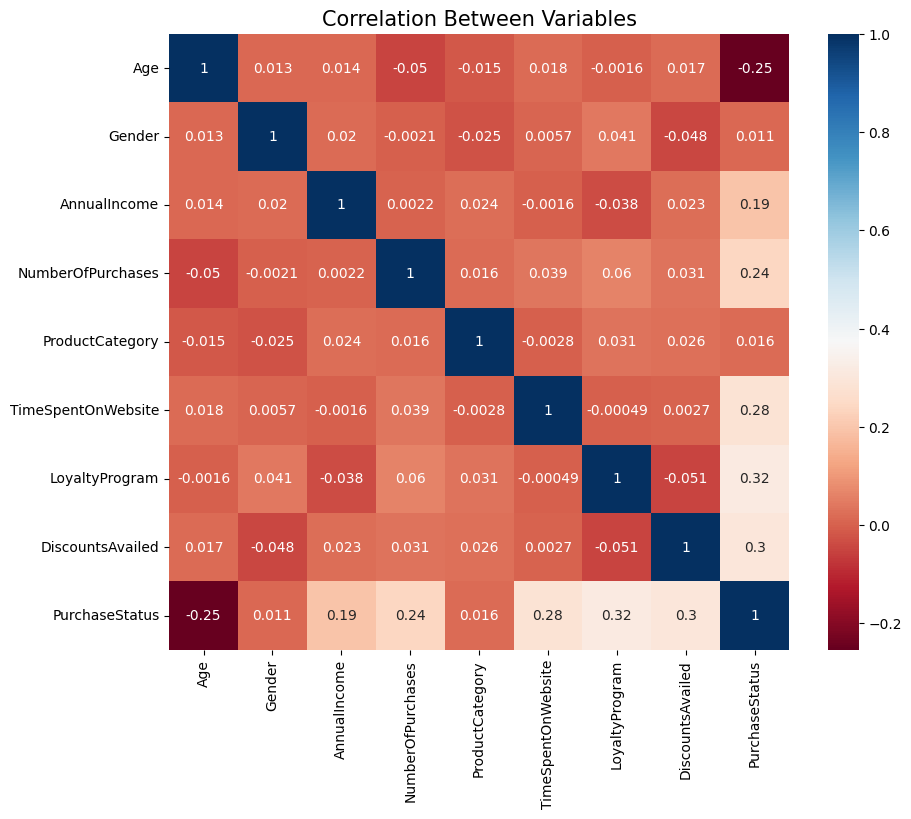

In [63]:
# menyeleksi kolom numerik dan memasukkannya ke variabel
num_df = df.select_dtypes(include=[np.number])

# variabel tadi dilakukan uji korelasi
corr_matrix = num_df.corr()

# Visualizing the correlations between numerical variabels
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="RdBu", annot=True)
plt.title("Correlation Between Variables", size=15);

Berikut saya kelompokkan kategorinya berdasarkan seberapa kuat korelasinya.

|Nilai Korelasi|Keterangan|
|:-----------:|:----------:|
|0,1-0,3|Rendah|
|0,4-0,6|Sedang|
|0,7-0,9|Tinggi|

- Saya mulai dari korelasi kolom `PurchaseStatus` yang notabene akan saya jadikan target. Tampaknya tidak ada fitur (kolom lainnya) yang memberikan pengaruh yang signifikan terhadap target.

- Tidak terlihat pula korelasi yang signifikan antara fitur satu dengan yang lainnya karena nilai korelasi tertinggi di atas bahkan tidak sampai 0,4 persen. 

- Jadi, saya berasumsi tidak perlu dilakukan feature selection lebih lanjut dan saya bisa lanjut memaksimalkan seluruh fitur yang ada.

- Akan tetapi, mari kita lihat lebih detail juga bagaimana profil selengkapnya pelanggan yang melakukan pembelian (purchase) maupun tidak.

## 4.4. Jenis Kelamin

Saya ingin melihat proporsi pelanggan maupun yang masih calon dari perusahaan ini sebagai berikut.

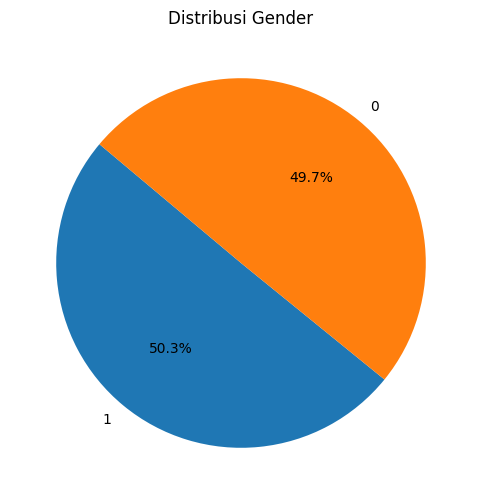

In [64]:
# Menghitung distribusi untuk kolom 'Gender'
gender_counts = df['Gender'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Gender')
plt.show()

Tampak baik laki-laki (0) dan perempuan (1) nyaris 50:50. Jadi, tidak terlalu signifikan perbedaannya meskipun lebih banyak sedikit dari kalangan perempuan.

## 4.5. Berdasarkan Purchase Status

Di sini, saya akan menelusuri apakah ada pola dari fitur tertentu yang sekiranya berkaitan dengan Purchase Status.

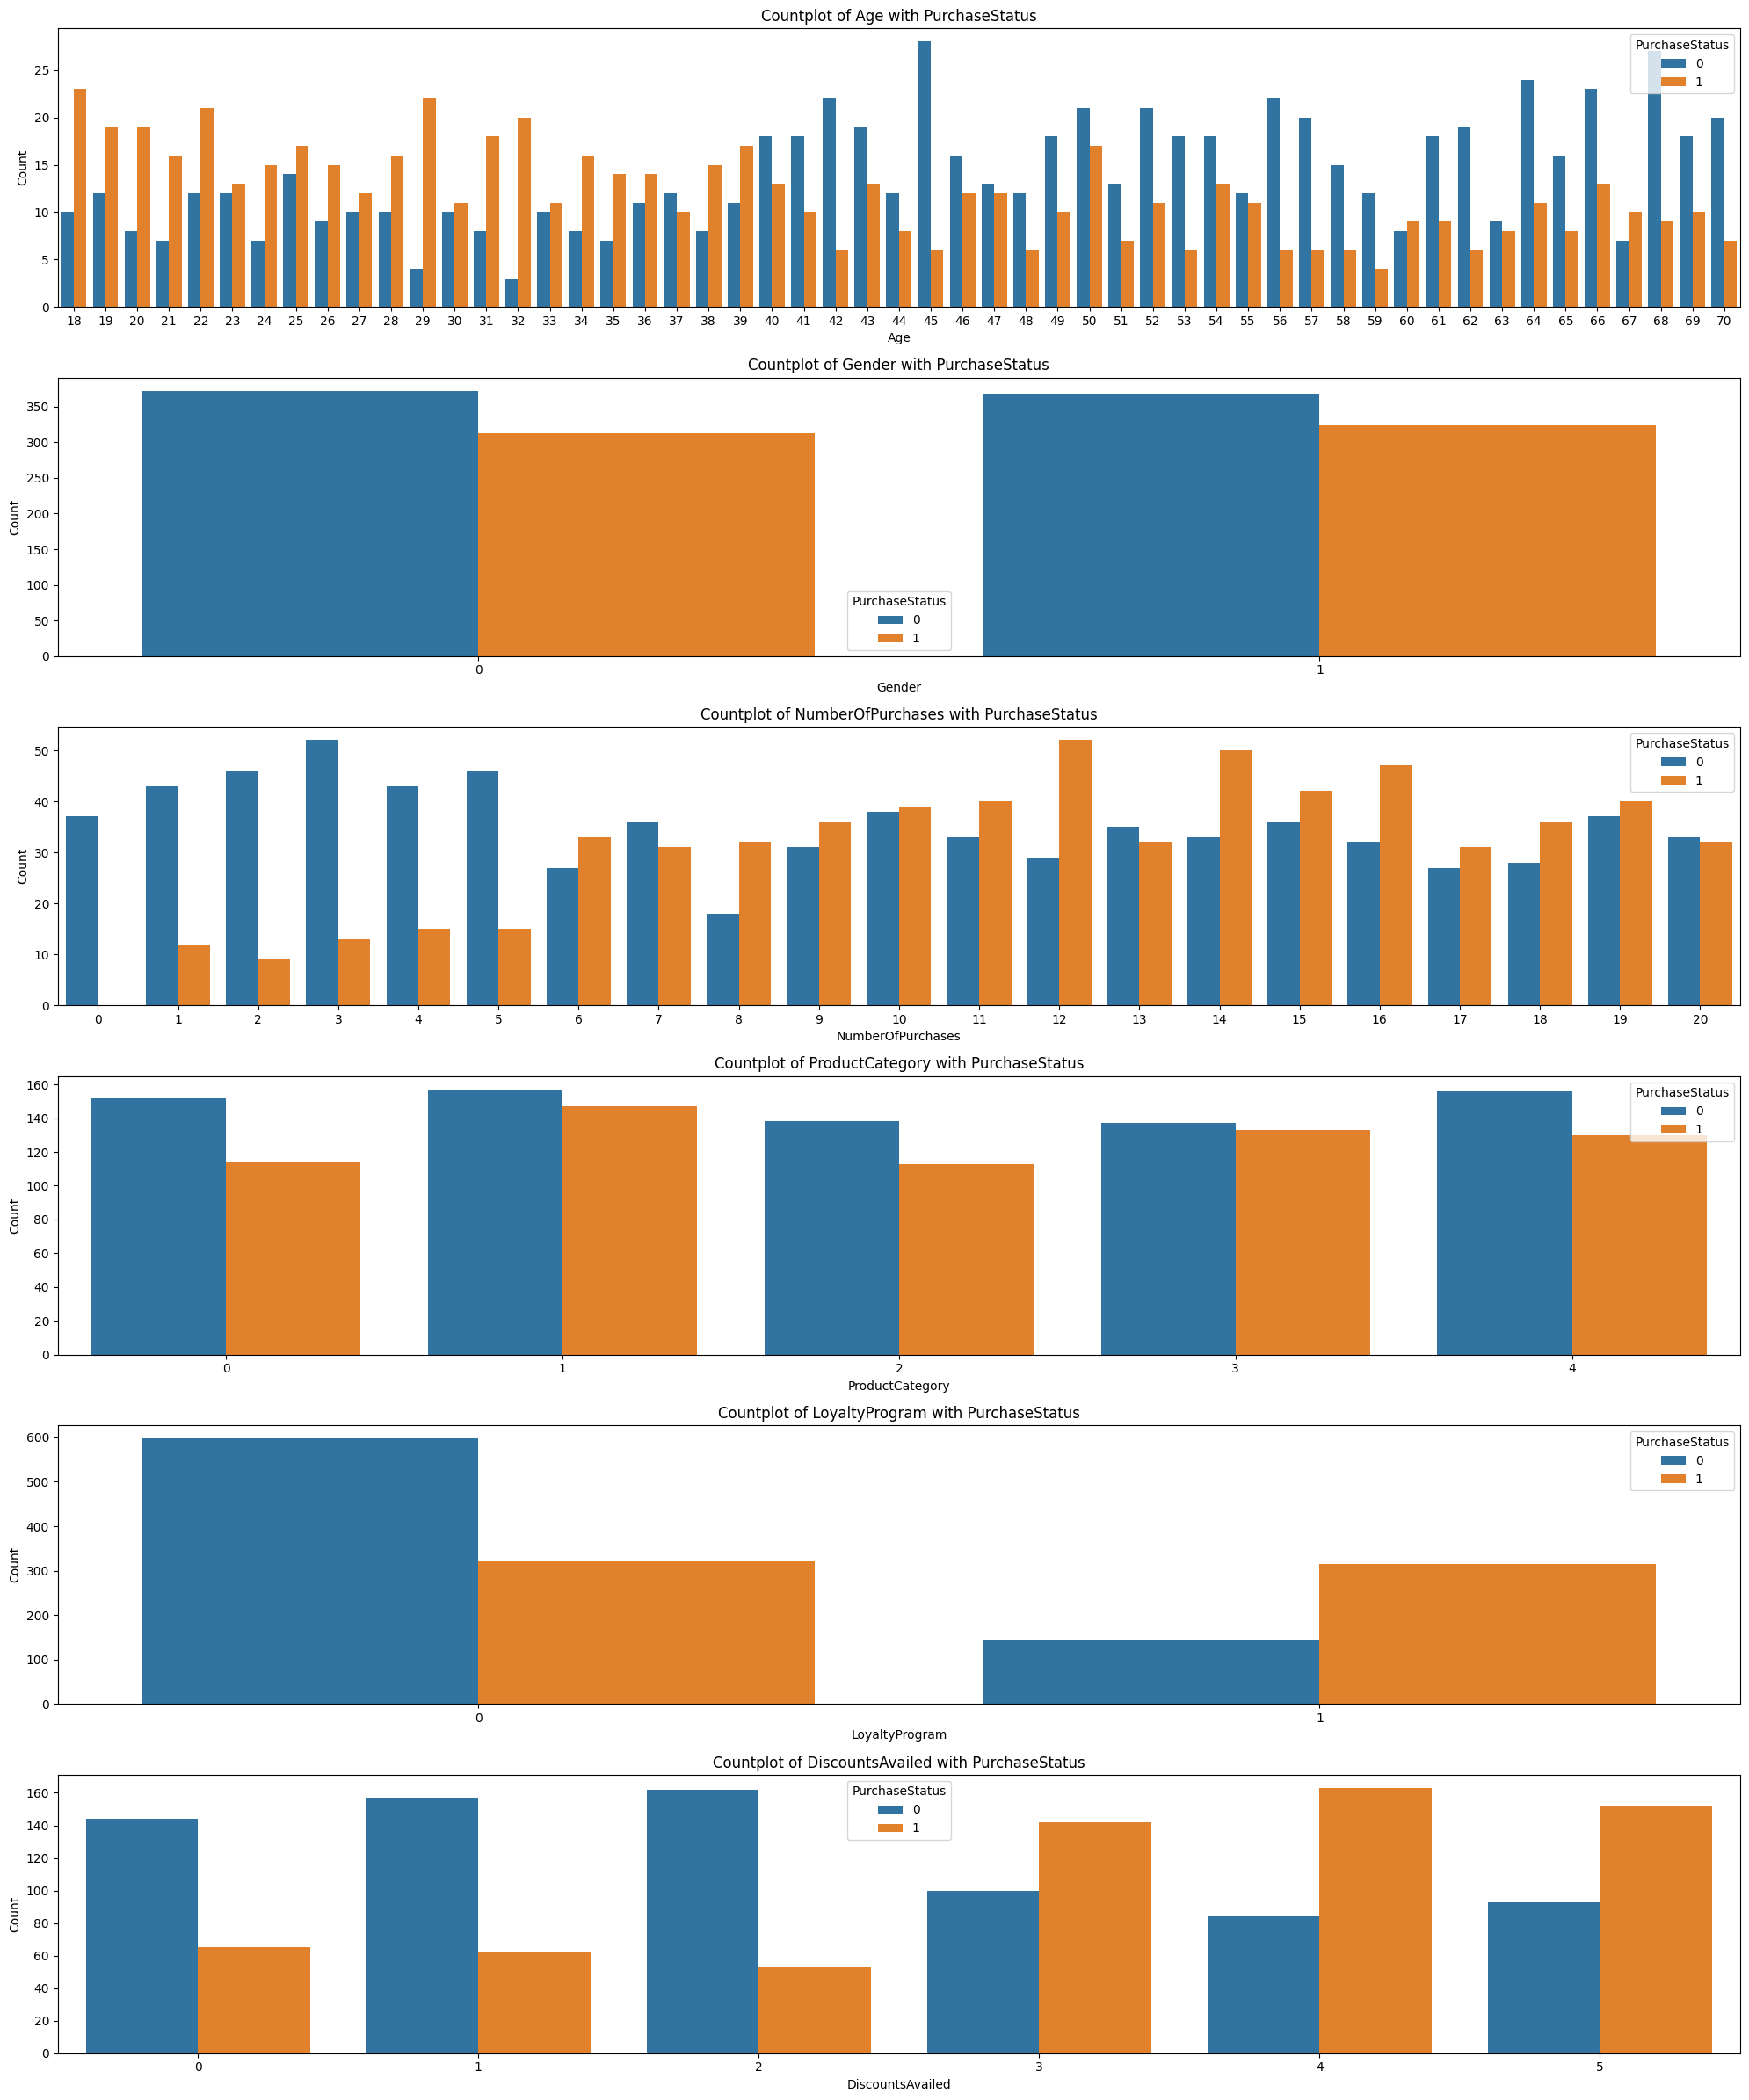

In [65]:
# Menghapus kolom target dari daftar kolom
columns = df.columns.drop(['PurchaseStatus', 'AnnualIncome', 'TimeSpentOnWebsite'])

# Mengatur ukuran figure berdasarkan jumlah kolom
plt.figure(figsize=(20, len(columns) * 4))

# Iterasi melalui semua kolom dan membuat countplot
for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.countplot(data=df, x=col, hue='PurchaseStatus')
    plt.title(f'Countplot of {col} with PurchaseStatus')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Ada banyak insight yang bisa digali dari grafik di atas. Berikut selengkapnya.

**Countplot of Age with PurchaseStatus:**

- Tampak bahwa saat memasuki usia paruh baya (mulai 40 tahun) ke atas, customer memiliki kecenderungan untuk lebih sering tidak menyelesaikan pembelian (no purchase). khususnya bagi pelanggan usia 45 tahun yang sangat kentara.

- Sebaliknya, untuk customer dengan rentang usia di bawah 40, justru lebih sering menyelesaikan pembelian (purchase), khususnya yang berusia 39 tahun.

- Sebagai informasi, memang ada fenomena dalam dunia e-commerce di mana pelanggan yang sedang melakukan checkout tidak lantas menyelesaikan pembayarannya. Itu disebut dengan **checkout abandonment**.

- Berdasarkan survei yang dilakukan Baymard Institute yang tertera pada laman https://www.bluesnap.com/shopping-cart-abandonment-vs-checkout-abandonment/ , ada banyak faktor yang mempengaruhi hal tersebut. Berikut dari faktor yang paling mungkin:

    1. biaya tambahan (seperti ongkir, pajak, dan lainnya) yang begitu tinggi,

    2. situs e-commerce menuntut pelanggan untuk membuat akun terlebih dahulu sebelum melakukan checkout,

    3. proses checkout yang panjang, 

    4. pelanggan tidak mempercayai informasi kartu kredit mereka akan terjamin keamanannya dengan berbelanja di e-commerce itu,

    5. total belanja tidak ditampilkan,

    6. website error,

    7. kurangnya alternatif metode pembayaran.                                   

Nah, dari sekian banyaknya faktor tersebut, saya belum bisa menjawab mana yang mempengaruhi. Itu karena fitur yang saya miliki tidak ada yang menampilkan informasi yang diasumsikan di atas.

Satu-satunya, yang saya bisa upayakan ialah mengecek apakah mungkin fitur `TimeSpentOnWebsite`.

Itu berangkat dari dugaan bahwa mungkin saja customer usia paruh baya hingga lansia cenderung memiliki waktu lebih sedikit untuk  dihabiskan di website ketimbang kelompok usia di bawahnya sehingga melewatkan informasi tentang checkout. 

Untuk memastikannya, saya akan lakukan langkah berikut.

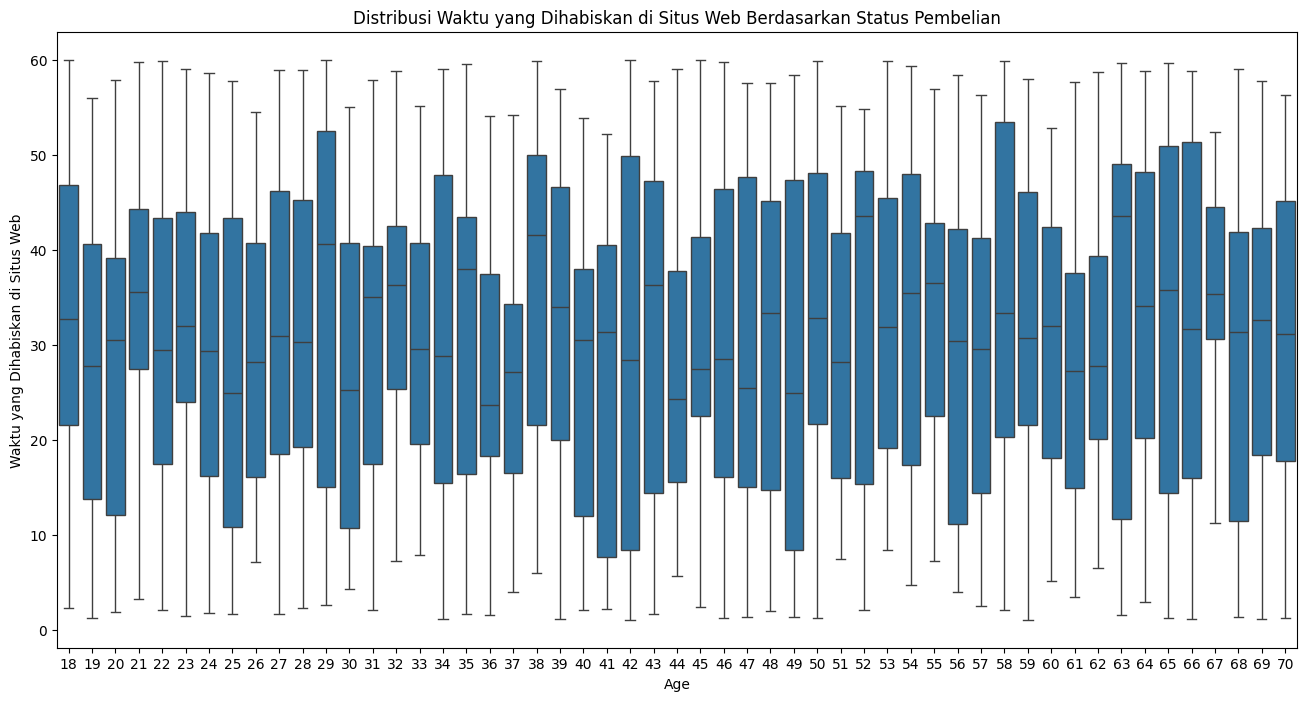

In [66]:
# cek perilaku customer dalam TimeSpenOnWebsit menurut usia 
plt.figure(figsize=(16, 8))
sns.boxplot(x='Age', y='TimeSpentOnWebsite', data=df)
plt.xlabel('Age')
plt.ylabel('Waktu yang Dihabiskan di Situs Web')
plt.title('Distribusi Waktu yang Dihabiskan di Situs Web Berdasarkan Status Pembelian')
plt.show()

Ternyata, tidak ada perubahan yang signifikan antara kelompok usia paruh baya dan lansia dengan kelompok usia di bawahnya dalam faktor `TimeSpentOnWebsite`. Itu berati kecenderungan checkout abandonment pada customer paruh baya dan lansia tidak dipengaruhi faktor tersebut.

Saya menyarankan untuk dianalisis lebih jauh faktor sebenarnya yang mempengaruhi kecenderungan tersebut. Selain itu, mungkin dari sisi bisnis, perusahaan bisa:

    1. menyediakan proses checkout di website yang lebih mudah,

    2. lengkapi alternatif metode pembayaran yang banyak dipakai oleh kelompok usia paruh baya dan lansia,

    3. memastikan informasi saat checkout lengkap, seperti menampilkan jumlah belanja 

**Countplot of Age with PurchaseStatus :**

- Menurut jenis kelamin, tidak tampak ada perbedaan behavior pada pelanggan saat menentukan akan menyelesaikan pembayaran atau tidak. Baik laki-laki (yang ditunjukkan dengan nilai 0) maupun perempuan (nilai 1) sama-sama memiliki pola `PurchaseStatus` yang tidak jauh berbeda.

- Baik customer pria maupun wanita, lebih cenderung tidak menyelesaikan pembelian (no purchase) daripada menyelesaikannya (purchase).

**Countplot of Product Category with PurchaseStatus:**

Sama seperti `Age`, fitur `ProductCategory` tidak terlihat mempengaruhi `PurchaseStatus`, baik produk 0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports. Keempatnya cenderung lebih banyak mengalami no purchase ketimbang purchase

**Countplot of Loyalty Program with PurchaseStatus:**

- Nah, fitur satu ini cukup berpengaruh terhadap keputusan menyelesaikan pembelian (PurchaseStatus).

- Rupanya kehadiran loyalty program cukup bisa mengatasi *checkout abandonment*. Itu karena pelanggan yang merupakan member of loyality program akan cenderung menyelesaikan pembayaran ketimbang yang bukan termasuk member.

- Mungkin strategi loyalty program bisa diperluas lagi targetnya tentu dengan menimbang budget yang ada. Dengan begitu, pembelian yang berhasil (purchase) akan makin tinggi juga.

**Countplot of Discounts Availed with PurchaseStatus:**

- Ada pola yang menarik di sini. Saat pelanggan sudah memakai diskon sebanyak 2 kali, ke depannya dia akan cenderung menyelesaikan pembelian.

- Begitu pula, sebaliknya. Jika pelanggan belum memanfaatkan diskon yang ada sampai 2 kali, kemungkinan dia untuk tidak menyelesaikan pembelian (no purchase) sangat tinggi.

- Saya menduga kecenderungan itu berkaitan dengan konsep behavioral pyschology.

- Dijelaskan bahwa secara psikologis, makin sering seseorang melakukan suatu tindakan, semakin kuat kebiasaan tersebut terbentuk. Dalam konteks belanja, jika pelanggan merasa puas dan nyaman dengan pengalaman pembelian mereka, mereka lebih cenderung untuk melakukan pembelian ulang.

- Dalam konteks ini, pelanggan merasa puas dan nyaman dengan adanya diskon. Makin sering dia menikmati diskon tersebut, makin berpeluang dia memanfaatkan kembali diskon tersebut dan menyelesaikan pembelian selanjutnya.

- Maka dari itu, perusahaan bisa menggencarkan pemberian diskon, khususnya untuk pelanggan baru. Dengan mengalami sendiri melakukan pembelian, kebiasaan mereka berbelanja di tempat kita akan terbentuk dan mereka akan terus melakukan repeat order.


### 4.5.1. Distribution of Time Spent On Website By Purchase Status

Saya juga ingin menelusuri apakah ada pola tertentu pada fitur `TimeSpentOnWebsite` yang berdasarkan target `PurchaseStatus`.

Text(0, 0.5, 'Waktu yang Dihabiskan di Situs Web')

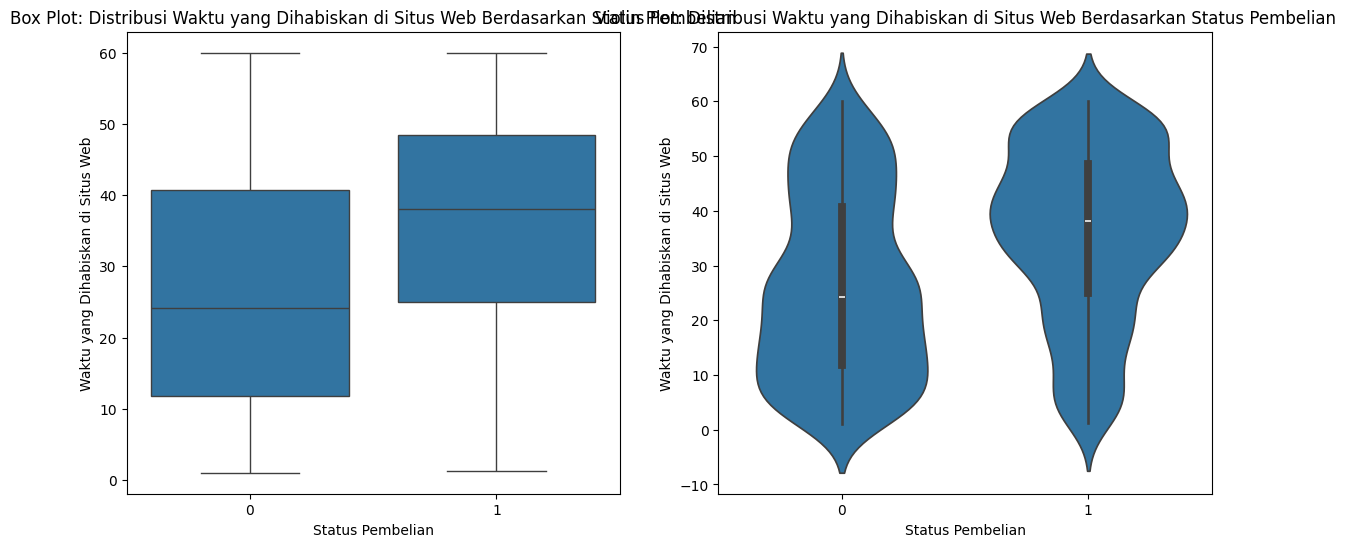

In [67]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot pada subplot pertama
sns.boxplot(ax=axes[0], x='PurchaseStatus', y='TimeSpentOnWebsite', data=df)
axes[0].set_title('Box Plot: Distribusi Waktu yang Dihabiskan di Situs Web Berdasarkan Status Pembelian')
axes[0].set_xlabel('Status Pembelian')
axes[0].set_ylabel('Waktu yang Dihabiskan di Situs Web')

# Violin Plot pada subplot kedua
sns.violinplot(ax=axes[1], x='PurchaseStatus', y='TimeSpentOnWebsite', data=df)
axes[1].set_title('Violin Plot: Distribusi Waktu yang Dihabiskan di Situs Web Berdasarkan Status Pembelian')
axes[1].set_xlabel('Status Pembelian')
axes[1].set_ylabel('Waktu yang Dihabiskan di Situs Web')

Walhasil:

- Dari kedua plot di atas, tampak variansi waktu yang dihabiskan customer yang `PurchaseStatus`, baik 0 (No Purchase) dan 1 (Purchase) sama panjangnya (bisa dilihat di Violin Plot).

- Hanya saja, ada perbedaan pada posisi mayoritas populasinya (seperti yang tertera di Box Plot). Populasi pelanggan yang No Purchase (0) cenderung terpusat di rentang 11 - 40 menit.

- Adapun mayoritas populasi pelanggan yang Purchase (1) berada di rentang 25-50 menit.

- Itu menunjukkan kebanyakan pelanggan yang menyelesaikan pembeliannya cenderung lebih lama dalam menghabiskan waktunya di website.

- Sebaliknya, pelanggan yang tidak menuntaskan pembeliannya relatif lebih sedikit menghabiskan waktunya di website.

- Untuk itu, perusahaan bisa menentukan strategi khusus yang membuat para calon pelanggan betah berada di website (Time Spent on Website).

- Caranya, antara lain, membuat desain website yang menarik, responsif, dan waktu loading-nya cepat. Bisa juga dengan menyediakan navigasi yang mudah, seperti menu yang jelas dan fitur pencarian yang efektif.

- Selain itu, mungkin juga dengan menyajikan konten yang berkualitas (misal deskripsi yang detail, gambar serta video yang berkualitas), testimoni, rekomendai produk yang dipersonalisasi per segmen users.

### 4.5.2. Distribution of Annual Income By Purchase Status

Berikutnya, saya akan mencari tahu apakah ada pola tertentu pada fitur `AnnualIncome` yang berdasarkan target `PurchaseStatus`.

Text(0, 0.5, 'Pendapatan Tahunan Customer')

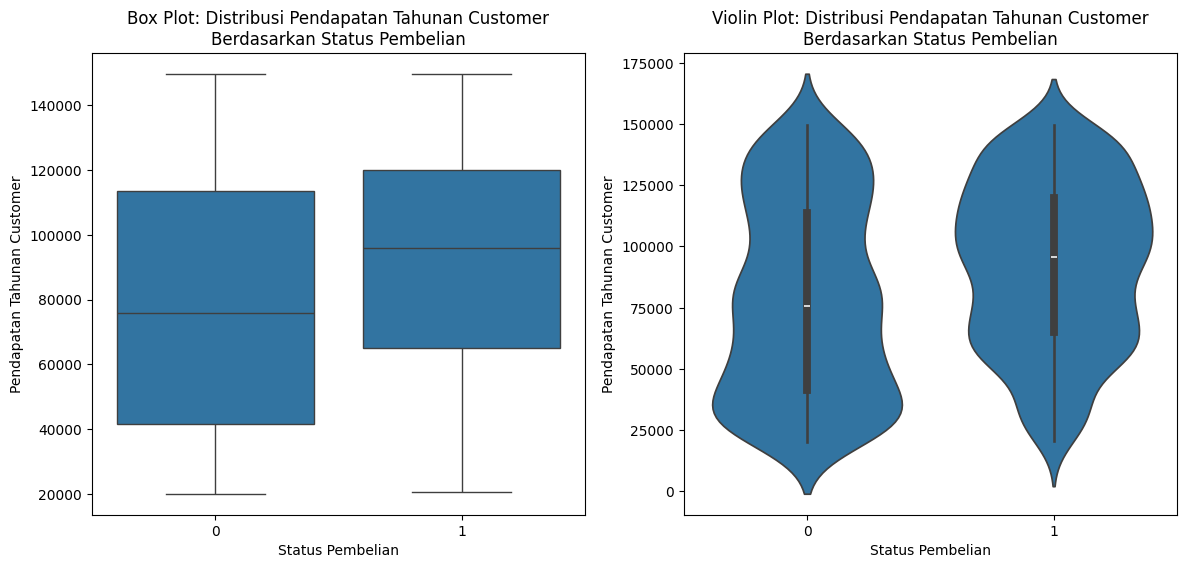

In [68]:
# Membuat figure dan axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot pada subplot pertama
sns.boxplot(ax=axes[0], x='PurchaseStatus', y='AnnualIncome', data=df)
axes[0].set_title('Box Plot: Distribusi Pendapatan Tahunan Customer\nBerdasarkan Status Pembelian')
axes[0].set_xlabel('Status Pembelian')
axes[0].set_ylabel('Pendapatan Tahunan Customer')

# Violin Plot pada subplot kedua
sns.violinplot(ax=axes[1], x='PurchaseStatus', y='AnnualIncome', data=df)
axes[1].set_title('Violin Plot: Distribusi Pendapatan Tahunan Customer\nBerdasarkan Status Pembelian')
axes[1].set_xlabel('Status Pembelian')
axes[1].set_ylabel('Pendapatan Tahunan Customer')

Terlihat:

- Masing-masing kelas target `PurchaseStatus` memiliki variansi yang sama panjang (seperti yang terlihat di Violin Plot). Hanya saja, ada perbedaan pada mayoritas populasinya (Box Plot).

- Mayoritas pelanggan yang No Purchase (0) cenderung memiliki pendapatan tahunan (`AnnualIncome`) yang relatif lebih rendah. 

- Sedangkan mayoritas pelanggan yang Purchase (1) cenderung punya pendapatan tahunan yang lebih tinggi.

- Wawasan tersebut bisa dimanfaatkan oleh perusahaan untuk ditindaklanjuti guna meningkatkan pembelian yang sukses (purchase).

- Sebagai contoh, karena sebenarnya pelanggan segmen menengah ke atas memiliki potensi untuk purchase yang lebih besar, kita bisa iming-iming penawaran menarik, seperti diskon, cashback, hingga menjadi member of loyalty program.

- Dengan begitu, diharapkan mereka akan lebih termanjakan saat melakukan transaksi. Dengan begitu, mereka akan segera menyelesaikan pembelian.

# 5. Feature Engineering

## 5.1. Split Target Column (y) 

Selanjutnya, saya menentukan sekaligus mendefinisikan mana kolom X (fitur) dan y (target).

In [69]:
# Splitting X and y
X = df.drop(columns=['PurchaseStatus'], axis=1)
y = df['PurchaseStatus']

# cek
display(X.head())
display(y.head())

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


0    1
1    0
2    1
3    1
4    1
Name: PurchaseStatus, dtype: int64

Tahapan ini berhasil.

## 5.2. Split Train-Set & Test-Set

Saya akan memisahkan mana yang menjadi train-set dan test-set.

In [70]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Cek dimensi
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)
print('Train size : ', y_train.shape)
print('Test size  : ', y_test.shape)


Train size :  (1032, 8)
Test size  :  (345, 8)
Train size :  (1032,)
Test size  :  (345,)


Langkah ini berjalan lancar. Saya juga akan memastikan lagi distribusi kelas pada target apakah masih seimbang setelah splitting dataset.

In [71]:
# cek distribusi kelas target
display(np.array(np.unique(y_train, return_counts=True)).T)
display(np.array(np.unique(y_test, return_counts=True)).T)

array([[  0, 569],
       [  1, 463]], dtype=int64)

array([[  0, 171],
       [  1, 174]], dtype=int64)

Baik, masih aman. Distribusi kelas masih tampak seimbang dan tidak ada yang mendominasi kelas lainnya.

## 5.3. Feature Transforming

Pada bagian ini, saya akan melakukan scaling untuk fitur-fitur numerikal dan encoding untuk yang bersifat kategorikal. 

Sebenarnya, fitur yang saya punya seluruhnya bertipe numerikal. Hanya saja, ada dari mereka yang bentuk sejatinya adalah object. Hanya saja, sudah di-encoding lebih dahulu.

Oleh karena itu, saya tetap memasukkanya ke kategori kategorikal.

Sebelum memulai feature transforming, saya akan memisahkan fitur-fitur yang ada menjadi dua, yakni kolom numerikal (`num_cols`) dan kolom kategorikal (`cat_cols`).

In [72]:
# Identify categorical and numerical columns
cat_cols = ['ProductCategory', 'LoyaltyProgram', 'Gender']
num_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

# cek
print(f"Berikut fitur yang tergolong kategorikal kolom: {cat_cols}\n")
print(f"Berikut fitur yang tergolong numerikal kolom: {num_cols}")

Berikut fitur yang tergolong kategorikal kolom: ['ProductCategory', 'LoyaltyProgram', 'Gender']

Berikut fitur yang tergolong numerikal kolom: ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']


Setelah dipisah, saya akan melakukan scaling dan encoding dengan memanfaatkan Pipeline.

In [73]:
# Preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[        
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'AnnualIncome', 'NumberOfPurchases',
                                  'TimeSpentOnWebsite', 'DiscountsAvailed']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ProductCategory', 'LoyaltyProgram',
                                  'Gender'])])

Feature transforming berhasil.

# 6. Model Definition

Pada project ini, saya menggunakan 5 model algoritma seperti yang diinstruksikan, yakni KNN, SVM, Decision Tree, dan Random Forest serta salah satu algoritma Boosting (dalam hal ini, saya memilih AdaBost Classifier).

Saya akan menggunakan setelah default (baseline model) masing-masing algoritma. 

In [74]:
# Build the model pipeline model SVC (SVM)
model_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Build the model pipeline model KNN
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Build the model pipeline model Decision Tree
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Build the model pipeline
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model_ada_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier())])

Ke-4 model algoritma telah didefinisikan.

# 7. Model Training

Setelah mendefinisikan model yang saya pakai, saya akan mulai melatih model sebagai berikut.

In [75]:
# Train the model SVC (SVM)
model_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'LoyaltyProgram',
                                                   'Gender'])])),
                ('classifier', SVC())])

In [76]:
# Train the model KNN
model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'LoyaltyProgram',
                                                   'Gender'])])),
                ('classifier', KNeighborsClassifier())])

In [77]:
# Train the model Decision Tree
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'LoyaltyProgram',
                                                   'Gender'])])),
                ('classifier', DecisionTreeClassifier())])

In [78]:
# Train the model Random Forest
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'LoyaltyProgram',
                                                   'Gender'])])),
                ('classifier', RandomForestClassifier())])

In [79]:
# Train the model Ada Bost Classifier
model_ada_clf.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'LoyaltyProgram',
                                                   'Gender'])])),
                ('classifier', AdaBoostClassifier())])

Model training usai.

# 8. Model Evaluation 1

**Metrik Evaluasi yang Dipakai**

Pada bagian ini, saya akan mengevaluasi model. Saya akan menggunakan metrik evaluasi **F1-Score**.

Itu karena saya menganggap False Negative (FN) maupun False Positive (FP) dalam objek analisis saya sama besar risikonya dan mesti diminimalkan.

Katakanlah, customer saya yang diprediksi melakukan pembelian, ternyata tidak jadi beli (False Positive) berarti anggaran pemasaran seperti untuk iklan digital, email marketing, dan lain sebagainya. yang kami alokasikan untuk customer yang dimaksud akan sia-sia.

Adapun kalau customer yang diprediksi tidak melakukan pembelian, ternyata malah jadi beli (False Negative) berarti berpotensi terjadi defisit atau kehabisan stok, terutama untuk produk unggulan.

Maka itu, saya memutuskan menggunakan metrik evaluasi F1-Score.

**Lantas kalau ada yang nilai F1-Score-nya tinggi atau rendah, apakah itu kebetulan?** 

Untuk memastikan hal itu, saya juga akan menggunakan `Cross Validation`.

Sebelum itu, saya akan membuat fungsi dahulu, yakni `performance_check` untuk memudahkan mengecek F1-Score secara reguler.

In [80]:
# Model Evaluation Function
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  return f1_score(y, y_pred)

SVC/SVM

In [81]:
# Check the Performance
print('F1 Score - Train : ', performance_check(model_svc, X_train, y_train))
print('F1 Score - Test  : ', performance_check(model_svc, X_test, y_test))

F1 Score - Train :  0.8244444444444444
F1 Score - Test  :  0.8083832335329342


In [82]:
# Cross Validation using `cross_val_score`

from sklearn.model_selection import cross_val_score

f1_train_cross_val = cross_val_score(model_svc,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())

F1 Score - All - Cross Validation  :  [0.77702703 0.82278481 0.72791519]
F1 Score - Mean - Cross Validation :  0.7759090104999663
F1 Score - Std - Cross Validation  :  0.03873842597293779


KNN

In [83]:
# Check the Performance
print('F1 Score - Train : ', performance_check(model_knn, X_train, y_train))
print('F1 Score - Test  : ', performance_check(model_knn, X_test, y_test))

F1 Score - Train :  0.8691099476439791
F1 Score - Test  :  0.75


In [84]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(model_knn,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())

F1 Score - All - Cross Validation  :  [0.76825397 0.79154079 0.73482428]
F1 Score - Mean - Cross Validation :  0.7648730116342058
F1 Score - Std - Cross Validation  :  0.0232775087029241


Decision Tree

In [85]:
# Check the Performance
print('F1 Score - Train : ', performance_check(model_dt, X_train, y_train))
print('F1 Score - Test  : ', performance_check(model_dt, X_test, y_test))

F1 Score - Train :  1.0
F1 Score - Test  :  0.8176100628930818


In [86]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(model_dt,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())

F1 Score - All - Cross Validation  :  [0.84542587 0.87820513 0.85234899]
F1 Score - Mean - Cross Validation :  0.8586599963338685
F1 Score - Std - Cross Validation  :  0.01410653637012678


Random Forest

In [87]:
# Check the Performance
print('F1 Score - Train : ', performance_check(model_rf, X_train, y_train))
print('F1 Score - Test  : ', performance_check(model_rf, X_test, y_test))

F1 Score - Train :  1.0
F1 Score - Test  :  0.8834355828220859


In [88]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(model_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())

F1 Score - All - Cross Validation  :  [0.86624204 0.90675241 0.87837838]
F1 Score - Mean - Cross Validation :  0.8837909427235006
F1 Score - Std - Cross Validation  :  0.016975364051354042


AdaBoost Classifier

In [89]:
# Check the Performance
print('F1 Score - Train : ', performance_check(model_ada_clf, X_train, y_train))
print('F1 Score - Test  : ', performance_check(model_ada_clf, X_test, y_test))

F1 Score - Train :  0.9397849462365592
F1 Score - Test  :  0.9069069069069069


In [90]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(model_ada_clf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())

print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1 Score - All - Cross Validation  :  [0.8807947  0.92948718 0.89115646]
F1 Score - Mean - Cross Validation :  0.9004794480196562
F1 Score - Std - Cross Validation  :  0.02094322299843033


**Model Overfit, Underfit, Atau Good?**

Performa ke-5 model algoritma telah keluar. Secara keseluruhan, bagus (good) dan tidak terlihat ada model yang overfit, apalagi underfit. Hasil test-set model-model di atas tidak jauh berbeda dengan train-set. 

**Cara Menentukan Model Terbaik**

Adapun untuk menentukan yang terbaik, saya akan melihat dari F1 Score Mean dan Std (Standar Deviasinya).

Sebagai informasi, saya menggunakan 3 folds. Maksudnya, data dibagi menjadi 3 bagian dan model akan dilatih serta dievaluasi dengan F1 Score sebanyak 3 kali (bisa dilihat di F1 Score - All - Validation). 

Hasil-hasil F1 Score tersebut kemudian dirata-ratakan yang ditunjukkan oleh F1 Score - Mean - Validation, sementara standar deviasi ketiganya bisa dilihat di F1 Score - Std - Cross Validation. 

**Model Terbaik**

Tampak model dengan algoritma `Random Forest` merupakan yang paling bagus berdasarkan F1-Score - Mean - Validation, yakni 0.885 meskipun F1-Score - Std - Validation-nya sedikit lebih jelek dari Ada Bost Classifier dan Decision Tree. 

Barulah kemudian disusul oleh model dengan algoritma Ada Bost Classifier yang F1-Score - Mean - Validation-nya 0.876, lalu disusul Decision Tree (0.85), SVC/SVM (0.77), dan terakhir, KNN (0.72).

Oleh karena itu, **saya memilih menggunakan model dengan Random Forest** untuk tahapan selanjutnya, yakni model inference dan model deployment.

# 9. Model Tuning

Saya akan melakukan hyperparameter tuning untuk model yang sebelumnya terpilih, yakni model dengan algoritma Random Forest.

Teknik yang saya pakai ialah Grid Search CV karena saya ingin pencarian setelan secara menyeluruh.

Langkah ini dimulai dari mendefinisikan parameter grid yang rencananya saya akan gunakan, baik dari parameter n_estimator (jumlah decision tree) yang dipakai, max-depth (kedalaman maksimum tiap decision tree), min sample leaf, dan lain-lain.

In [46]:
# Reuse best hyperparameters from Random Search for efficiency
grid_search_params = {
    'n_estimators': [1100, 1150, 1200, 1250, 1300],
    'max_depth': [120],
    'min_samples_split': [8, 9, 10, 11, 12],
    'min_samples_leaf': [8, 10, 12],
    'criterion': ['entropy']
}

grid_search_params

{'n_estimators': [1100, 1150, 1200, 1250, 1300],
 'max_depth': [120],
 'min_samples_split': [8, 9, 10, 11, 12],
 'min_samples_leaf': [8, 10, 12],
 'criterion': ['entropy']}

Setelah itu, saya akan menginisialisai model Grid Search CV dan melatih model dengan itu.

In [47]:
# Train with Grid Search

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

rf_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [120],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [8, 9, 10, 11, 12],
                         'n_estimators': [1100, 1150, 1200, 1250, 1300]},
             scoring='f1', verbose=2)

Di sini, setelan terbaik telah didapatkan sebagai berikut.

In [48]:
# Display Best Hyperparamters from Random Search

rf_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 120,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 1250}

Setelan terbaik tersebut dimasukkan dahulu ke variabel untuk selanjutnya digunakan pada model evaluation.

In [49]:
# Get Best Estimator SVC
best_estimator_rf = rf_gridcv.best_estimator_

Saya akan memasukkan langkah-langkah dari fitur transformasi hingga hyperparameter tuning ke dalam pipeline.

In [50]:
# membuat pipeline final
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_estimator_rf)
])

In [51]:
# melatih pipeline dengan train-set
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ProductCategory',
                                                   'LoyaltyProgram',
                                                   'Gender'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=120,
                                        min_samples_leaf=12,
                                        min_samples_split=8,
                                        n_estimators=1250))])

Sampai sini, model selesai dilakukan hingga tahapan hyperparameter tuning.

# 10. Model Evaluation 2

Pada tahap ini, saya akan kembali melakukan model evaluation setelah dilakukan hyperparameter tuning.

F1 Score - Test Set Sebelum Tuning : 0.8936170212765957

F1 Score - Test Set Setelah Tuning  : 0.8957055214723927

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       171
           1       0.96      0.84      0.90       174

    accuracy                           0.90       345
   macro avg       0.91      0.90      0.90       345
weighted avg       0.91      0.90      0.90       345

Confusion Matrix  : 


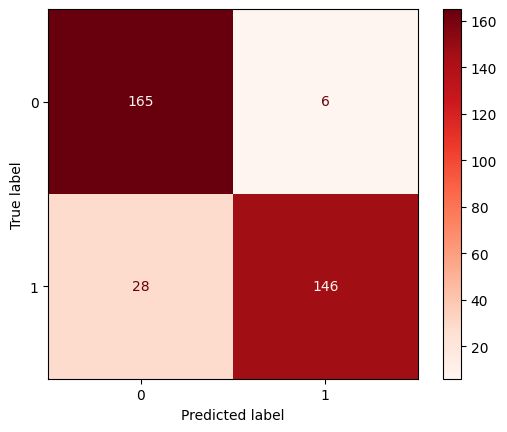

In [52]:
# predict
y_test_pred= final_pipeline.predict(X_test)

# cek performance model
print(f'F1 Score - Test Set Sebelum Tuning : {performance_check(model_rf, X_test, y_test)}\n')
print(f'F1 Score - Test Set Setelah Tuning  : {f1_score(y_test, y_test_pred)}\n')
print(classification_report(y_test, y_test_pred))
print('Confusion Matrix  : \n', ConfusionMatrixDisplay.from_estimator(final_pipeline, X_test, y_test, cmap='Reds'))

Untuk menjammin bahwa nilai dari model tersebut bukanla kebetulan, mari cek juga dengan cross val score berikut.

In [53]:
# Cross Validation using `cross_val_score`

f1_train_cross_val = cross_val_score(best_estimator_rf,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())

print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())

F1 Score - All - Cross Validation  :  [0.90675241 0.92105263 0.92255892]
F1 Score - Mean - Cross Validation :  0.9167879885711443
F1 Score - Std - Cross Validation  :  0.007122819308615178


**Analisis:**

- Terlihat hasil setelah dilakukan hyperparamter tuning, nilai F1 Score meningkat dari yang semula hanya 0,907 menjadi 0.92. 

- Itu berarti tuning berhasil meningkatkan performa model, khususnya dalam hal keseimbangan antara aspek precision dan recall-nya.

- Performa precision (guna meminimalkan False Positif), recall (untuk meminimalkan False Negative), dan F1-Score (keseimbangan pada ke-2 aspek sebelumnya) di kelas 0 dan 1 juga tampak bagus. Masng-masing nilainya di atas 90 persen.

- Dengan begitu, *classification error* pada model ini tidak sampai 10 persen.

- Terlihat pada confusion matrix: 
    1. True Positive (TP) yang berada pada baris 1 kolom 1 berjumlah 144. Dengan begitu, dari 152 yang diprediksi positif (pelanggan melakukan pembelian/purchase), 114 di antaranya memang melakukan pembelian.

    2. True Negative (TN) yang berada pada baris o kolom 0 berjumlah 207. Jadi, dari 223 yang diprediksi negatif (pelanggan tidak melakukan pembelian/purchase), 207 di antaranya memang tidak membeli.

    3. False Positive (FP) yang berada pada baris 0 kolom 1 berjumlah 8. Itu berarti ada prediksi meleset yang menyatakan bahwa terdapat 8 customer diperkirakan akan melakukan purchase, tetapi sebenarnya tidak.

    4. False Negative (FN) yang berada pada baris 1 kolom 0 berjumlah 16. Itu berarti ada prediksi meleset yang menyakan bahwa terdapat 16 customer diperkirakan tidak akan melakukan purchase, tetapi pada akhirnya membeli.

- Oleh karena itu, nilai recall yang lebih sensifitf dengan False Positive (FP) tampak lebih besar dibanding dengan precision yang sensitif terhadap False Negative (FN).

- Selain itu, bila dilihat dari cross val score-nya terlihat nilai F1 Score yang dimiliki model ini memang terjamin. Terlihat dari F1 Score Mean Validation-nya mencapai 0,91 (91 %). Sementara, standar deviasi F1 Score-nya bahkan tidak sampai 1 persen, yakni 0,7 persen.

- **Jadi, secara keseluruhan model ini performanya cukup baik dan layak dipergunakan**.

**Kelebihan dari Sisi Bisnis**:

Jika model ini digunakan, perusahaan akan memiliki banyak manfaat: 

- Perusahaan dapat memaksimalkan anggaran pemasaran seperti iklan digital, email marketing, dan lainnya kepada customer yang memang berpotensi besar untuk melakukan pembelian. 

- Dengan begitu Marketing Return on Investment (ROI) bisa optimal. Setiap rupiah dana yang dikeluarkan untuk pemasaran bisa menghasilkan keuntungan/omzet.

- Pasokan bisa lebih stabil karena lebih terencana, khususnya pada produk ungulan yang kemungkinan banyak dibeli. Jadi, tidak terjadi kehabisan atau kelebihan pasokan.

**Kekurangan dari Sisi Bisnis**

Secara keseluruhan, model ini cukup mumpuni untuk memprediksi apakah pelanggan tertentu jadi melakukan pembelian atau tidak. Hanya saja, masih memiliki kekurangan berikut.

- Kemampuan untuk menangkap False Negative (FN) lebih rendah ketimbang False Positive (FP).

- Oleh karena itu, terkadang model memprediksi sesorang tidak akan melakukan pembelian, justru yang bersangkutan membeli pada akhirnya.

- Namun, sekali lagi, kejadian tersebut tidak sampai 10 persen. Misal dari 100 kali prediksi, meleset kurang dari 10 di antaranya.

- Selain itu, model ini belum bisa memprediksi kira-kira kategori produk apa yang bakal dibeli setelah si A diasumsikan akan melakukan pembelian. 

# 11. Model Saving

Setelah tidak ada masalah dalam modeling, model disimpan untuk kemudian digunakan pada modul lain guna melakukan model inference.

In [54]:
# save model
joblib.dump(final_pipeline, "my_model.pkl")

['my_model.pkl']

Model berhasil disimpan.

# 12. Pengambilan Kesimpulan

**Dari EDA:**
- Perusahaan bisa mencari tahu lebih lanjut faktor apa yang menyebabkan pelanggan dengan usia paruh baya hingga lansia kerap tidak menyelesaikan pembelian (fenomena checkout abandonment).

- Sementara itu, perusahaan bisa:

    1. menyediakan proses checkout di website yang lebih mudah,

    2. lengkapi alternatif metode pembayaran yang banyak dipakai oleh kelompok usia paruh baya dan lansia,

    3. memastikan informasi saat checkout lengkap, seperti menampilkan jumlah belanja.

- Kehadiran loyalty program cukup bisa mengatasi *checkout abandonment*. Itu karena pelanggan yang merupakan member of loyality program akan cenderung menyelesaikan pembayaran ketimbang yang bukan termasuk member.

- Mungkin strategi loyalty program bisa diperluas lagi targetnya tentu dengan menimbang budget yang ada. Dengan begitu, pembelian yang berhasil (purchase) akan makin tinggi juga. 

- Distribusi kelas pada target/label relatif seimbang sehingga tidak perlu dilakukan penanganan khusus. 

- Dataset ini cukup ideal karena juga distribusi datanya cukup normal sehingga bisa dipergunakan untuk berbagai macam analisis maupun pembuatan machine learning.

- Selain itu, korelasi antar fitur juga kecil sehingga tidak lagi perlu dilakukan feature extraction apalagi feature selection.

-  Perusahaan pun bisa menggencarkan pemberian diskon, khususnya untuk pelanggan baru. Dengan mengalami sendiri melakukan pembelian, kebiasaan mereka berbelanja di tempat kita akan terbentuk dan mereka akan terus melakukan repeat order.

- Faktor seberapa lama pelanggan menghabiskan waktunya di website menjadi salah satu faktor yang mempengaruhi keputusannya untuk menyelesaikan pembelian. Maka itu, buatlah mereka betah, mulai dari memperbagus konten dan lainnya.

- Pelanggan yang kerap menyelesaikan pembelian merupakan pelanggan dari kalangan menengah ke atas. Sasar mereka dengan berbagai penawawran menarik.

**Dari Feature Engineering:**

- Bila berdasarkan setelan default (baseline model), algoritma Random Forest paling unggul. Barulah algoritma ensemble lain, yaitu AdaBoost.

- Terendah (dalam konteks model yang saya kerjakan) ialah KNN. 

- Oleh karena itu, saya mengamini secara performa memang algoritme bertipe ensemble lebih unggul ketimbang algoritma independen.

- Hanya saja memang yang perlu dipertimbangkan, yaitu sumber daya komputasi dan waktu.

**Dari Mode Tuning:**

- Model tuning terbukti memiliki peran yang signifikan dalam meningkatkan performa model. 

- Khusus dalam masalah yang saya hadapi, ada peningkata kinerja model hingga 2 persen. Menurut saya, itu sudah cukup besar karena tingkat keakuratannya sudah tembus lebih dari 90 persen.

**Untuk ke depannya:**

- Saya rasa performa model ini masih bisa ditingkat berapa persen lagi, terlebih banyak parameter Random Forest yang belum dioptimalkan.

- Dari segi fitur, saya menilai model ini masih bisa ditingkatkan. Mungkin dengan penambahan fitur clustering customer hingga prediksi total belanja atau kategori barang yang dibeli.

- Fitur-fitur tambahan itu tentu akan sangat bermanfaat untuk perusahaan karena bisa digunakan untuk proyeksi pengadaan barang maupun proyeksi penjualan.

- Dengan begitu, perencanaan perusahaan bisa lebih matang. 

# 13. Conceptual Problems

## 13.1. Latar Belakang Adanya Bagging dan Cara Kerjanya

Kehadiran bagging bermula dari keterbatasan yang dimiliki oleh model-model individual/independen. Namun, kekurangan tersebut rupanya bisa ditutupi dengan kehadiran model lainnya. 

Dari sanalah, teknik bagging itu muncul. Cara kerjanya, berbagai model dilatih secara independen di subset data train yang berbeda dari dataset yang sama. 

Hasil prediksinya kemudian digabung. Khusus untuk model klasifikasi, hasil akhirnya diambil dari voting mayoritas.

## 13.2. Perbedaan Cara Kerja Algoritma Random Forest dengan Boosting

Random forest merupakan salah satu algoritma yang paling populer dari tekni bagging. Cara kerjanya, beberapa decision tree digabungkan lalu dilatih pada subset yang berbeda kemudian diambil voting mayoritas untuk menentukan prediksi akhirnya.

Sedangkan boosting, itu adalah teknik ensemble lainnya dalam machine learning yang menggabungkan beberapa model lemah untuk menciptakan model yang lebih kuat atau akurat. 

## 13.3. Maksud dari Cross Validation

Cross Validation adalah salah satu teknik dalam pembuatan model machine learning yang tujuannya menghindari overfitting. Dengan begitu, kejadian model hanya bagus kinerjanya di train set saja, tetapi jelek di test-set bisa dihindari.

Dengan cara ini, kita bisa memastikan bahwa hasil evaluasi dari metrik yang kita gunakan itu memang benaran dan bukan kebetulan semata.